<a href="https://colab.research.google.com/github/farshidbalan/Mastering-machine-learning-algorithms/blob/master/Chapter_1_Machine_Learning_Model_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Models and data

Githib:https://github.com/PacktPublishing/Mastering-Machine-Learning-Algorithms

#### what is the task of parametric process?

The task of a parametric learning process is __to find the best parameter set that maximizes a target function__, the value of which is proportional to the accuracy of the model, given specific input X and output Y datasets (or proportional to the error, if we're trying to minimize the error). 

## Limited Sample Populations			

### Remark
data scientists must pay close attention to how a model is tested, to be sure that new samples are generated by the same process as the training samples were. If there are strong discrepancies, data scientists should warn end users about the differences in the samples.

N values are independent and identically distributed (i.i.d.) if they are sampled from the same distribution, and two different sampling steps yield statistically independent values (that is, p(a, b) = p(a)p(b)). If we sample N i.i.d. values from p\_data, we can create a finite dataset X made up of k-dimensional real vectors:

![image.png](attachment:image.png)

In a supervised scenario, we also need the corresponding labels (with t output values):
![image.png](attachment:image.png)

When the output has more than two classes, there are different possible strategies to manage the problem.
- In classical machine learning, one of the most common approaches is __One-vs-All__, which is based on training N different binary classifiers, where each label is evaluated against all the remaining ones. In this way, N-1 classifications are performed to determine the right class.
- With shallow and deep neural models, instead, it's preferable to use a softmax function to represent the output probability distribution for all classes:

![image.png](attachment:image.png)

A sharp-eyed reader might notice that calculating the softmax output of a population allows one to obtain an approximation of the data generating process.

## Scaling datasets			

#### important
Many algorithms (such as logistic regression, Support Vector Machines (SVMs) and neural networks) show better performances when the dataset has a feature-wise null mean. Therefore, one of the most important preprocessing steps is so-called zero-centering, which consists of subtracting the feature-wise mean $E_x[X]$ from all samples:

![image.png](attachment:image.png)

Zero-centering is not always enough to guarantee that all algorithms will behave correctly. Different features can have very different standard deviations, and therefore, an optimization that works considering the norm of the parameter vector (see the section about regularization) will tend to treat all the features in the same way. This equal treatment can produce completely different final effects; features with a smaller variance will be affected more than features with a larger variance.

### What is z-score and how we calculate it?

In a similar way, when single features contribute to finding the optimal parameters, __features with a larger variance can take control over the other features, forcing them in the context of the problem to become similar to constant values__. In this way, those less-varied features lose the ability to influence the end solution (for example, this problem is a common limiting factor when it comes to regressions and neural networks).

For this reason, If ,$x_i \in R^n$, $\mu$ and $\sigma \in R^n $ and are computed considering every single feature for the whole dataset, __it's often helpful to divide the zero-centered samples by the feature-wise standard deviation__, obtaining the so-called __z-score__:

![image.png](attachment:image.png)

How does Range scaling work?

Another approach to scaling is to __set the range where all features should lie__.

Range scaling behaves in a similar way to standard scaling, but in this case, both the new mean and the new standard deviation are determined by the chosen interval. In particular, if the original features have symmetrical distributions, the new standard deviations will be very similar, even if not exactly equal. For this reason, this method can often be chosen as an alternative to a standard scaling (for example, when it's helpful to bound all the features in the range $[0, 1]$).

### What is the drawback with range scaling and z-score?

they are very sensitive to outliers. In fact, when the dataset contains outliers, their presence will affect the computation of both mean and standard

### How Robust scaling resolve the issue with outliers in dataset?
An alternative, robust approach is based on the usage of quantiles. Given a distribution $p$ over a range $[a, b]$, the most common quantile, called median, 50th percentile or second quartile $(Q2)$, is the value the splits the range $[a, b]$ into two subsets so that $P([a, m]) = P([m, b]) = 0.5$. That is to say, in a finite population, the median is the value in the central position.

### Write the formula for Interquartile Range (IQR)

A common choice for scaling the data is the __Interquartile Range (IQR)__, sometimes called __H-spread__, defined as:

![image.png](attachment:image.png)

In the previous formula, $Q_1$ is the cut-point the divides the range $[a, b]$ so that $25\%$ of the values are in the subset $[a, Q_1]$, while $Q_2$ divides the range so that $75\%$ of the values are in the subset $[a, Q_2]$. Considering the previous set $A'$, we get
![image.png](attachment:image.png)

The robust scaling procedure is very similar to the standard one, and the transformed values are obtained using the feature-wise formula:

![image.png](attachment:image.png)

Where $m$ is the median and $QR$ is the quantile range (for example, $IQR$).

In [ ]:
import numpy as np
nb_samples = 200
mu = [1.0, 1.0]
covm = [[2.0, 0.0], [0.0, 0.8]]
X = np.random.multivariate_normal(mean=mu, cov=covm, size=nb_samples)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

rs = RobustScaler(quantile_range=(10, 90))
X_rs = rs.fit_transform(X)

mms = MinMaxScaler(feature_range=(-1, 1))
X_mms = mms.fit_transform(X)

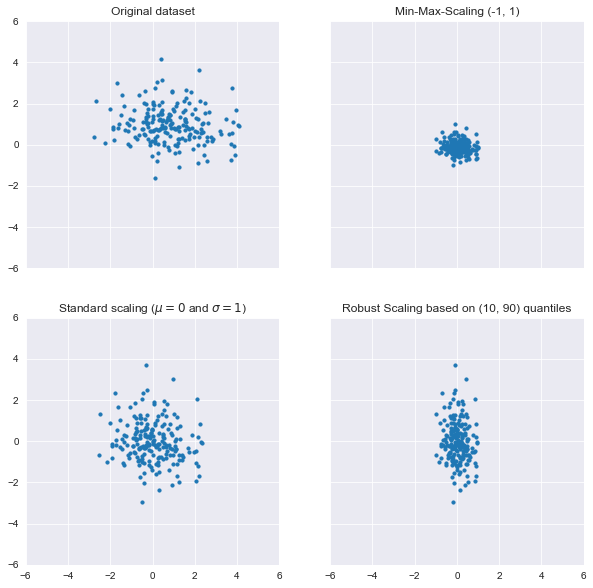

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style("darkgrid")
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].scatter(X[:, 0], X[:, 1], s=10)
ax[0, 0].set_title("Original dataset")

ax[0, 1].scatter(X_mms[:, 0], X_mms[:, 1], s=10)
ax[0, 1].set_title("Min-Max-Scaling (-1, 1)")

ax[1, 0].scatter(X_ss[:, 0], X_ss[:, 1], s=10)
ax[1, 0].set_title(r"Standard scaling ($\mu = 0$ and $\sigma=1$)")

ax[1, 1].scatter(X_rs[:, 0], X_ss[:, 1], s=10)
ax[1, 1].set_title("Robust Scaling based on (10, 90) quantiles")

ax[0, 0].set_xlim(-6, 6)
ax[0, 0].set_ylim(-6, 6)
plt.show()

### Important: Rule of thums for scaling:

- standard scaling is normally the first choice. 
- Range scaling can be chosen as a valid alternative when it's necessary to project the values onto a specific range, or when it's helpful to create sparsity. 
- If the analysis of the dataset has highlighted the presence of outliers and the task is very sensitive to the effect of different variances, robust scaling is the best choice.

## Normalization

One particular preprocessing method is called normalization (not to be confused with statistical normalization, which is a more complex and generic approach) and consists of transforming each vector into a corresponding one with a unit norm given a predefined norm (for example, $L2$):

![image.png](attachment:image.png)

Given a zero-centered dataset X, containing points , the normalization using the $L2$ (or Euclidean) norm transforms each value into a point lying on the surface of a hypersphere with unit radius, and centered in ![image.png](attachment:image.png)
(by definition all the points on the surface have 

![image.png](attachment:image.png)

Contrary to the other methods, normalizing a dataset leads to a projection where the existing relationships are kept only in terms of angular distance. 

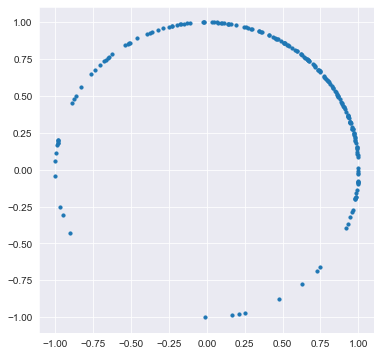

In [ ]:
from sklearn.preprocessing import Normalizer
nz = Normalizer("l2")
X_nz = nz.fit_transform(X)
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharex=True, sharey=True)
ax.scatter(X_nz[:, 0], X_nz[:, 1], s=10)
plt.show()

### Question

In which cases we use normalizer?

### Answer
In some contexts, such as Natural Language Processing (NLP), __two feature vectors are different in proportion to the angle they form, while they are almost insensitive to Euclidean distance.__

For example, let's imagine that the previous diagram defines four semantically different concepts, which are located in the four quadrants. In particular, imagine that opposite concepts (for example, cold and warm) are located in opposite quadrants so that the maximum distance is determined by an angle of  radians (180°). Conversely, two points whose angle is very small can always be considered similar.

In this common case, we assume that the transition between concepts is semantically smooth, so two points belonging to different sets can always be compared according to their common features (for example, the boundary between warm and cold can be a point whose temperature is the average between the two groups). __The only important thing to know is that if we move along the circle far from a point, increasing the angle, the dissimilarity increases.__

In [ ]:
X_test = np.array([[-4, 0],
                   [-1, 3]])
Y_test = nz.fit_transform(X_test)
print(np.arccos(np.dot(Y_test[0], Y_test[1])))

1.2490457723982544


The dot product between two vectors x1 and x2 is equal to:
![image.png](attachment:image.png)

The last step derives from the fact that both vectors have unit norms. Therefore, the angle they form after the projection is almost $\frac{\pi}{2}$, indicating that they are indeed orthogonal.

### Remark

If we multiply the vectors by a constant, their Euclidean distance will obviously change, but the angular distance after normalization remains the same. I invite you to check it!

## WHITENING
#### Need to study and learn more

Another very important preprocessing step is called whitening, which is the operation of imposing an identity covariance matrix to a zero-centered dataset:

![image.png](attachment:image.png)

As the covariance matrix $E_{x}[X^TX]$  is real and symmetrical, it's possible to eigendecompose it without the need to invert the eigenvector matrix:

![image.png](attachment:image.png)

The matrix $V$ contains the eigenvectors as columns, and the diagonal matrix $\Omega$ contains the eigenvalues. To solve the problem, we need to find a matrix $A$, such that:

![image.png](attachment:image.png)

Using the eigendecomposition previously computed, we get:

![image.png](attachment:image.png)

Hence, the matrix A is:

![image.png](attachment:image.png)

### What are the benefits of whitening
1. One of the main advantages of whitening is the decorrelation of the dataset, which allows for an easier separation of the components. Furthermore, if X is whitened, any orthogonal transformation induced by the matrix P is also whitened:

![image.png](attachment:image.png)

2. Moreover, many algorithms that need to estimate parameters that are strictly related to the input covariance matrix can benefit from whitening, because it reduces the actual number of independent variables. In general, these algorithms work with matrices that become symmetrical after applying the whitening.

3. Another important advantage in the field of deep learning is that the gradients are often higher around the origin and decrease in those areas where the activation functions (for example, the hyperbolic tangent or the sigmoid) saturate (). That's why the convergence is generally faster for whitened—and zero-centered—datasets.

In [ ]:
import numpy as np
def zero_center(X):
    return X - np.mean(X, axis=0)

def whiten(X, correct=True):
    Xc = zero_center(X)
    _, L, V = np.linalg.svd(Xc)
    W = np.dot(V.T, np.diag(1.0 / L))
    return np.dot(Xc, W) * np.sqrt(X.shape[0]) if correct else 1.0

Text(0.5, 1.0, 'Whitened dataset')

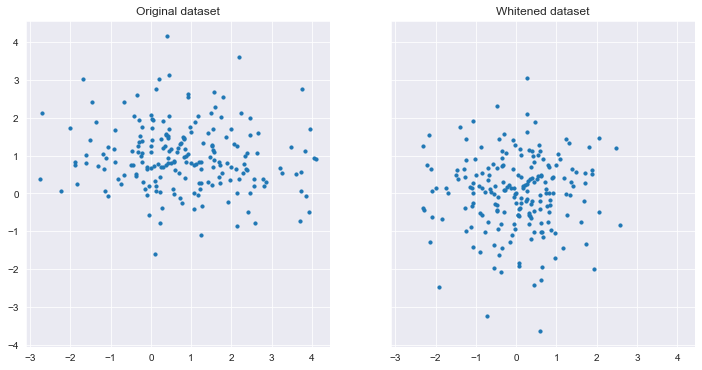

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax[0].scatter(X[:, 0], X[:, 1], s=10)
ax[0].set_title("Original dataset")

X_wt = whiten(X)

ax[1].scatter(X_wt[:, 0], X_wt[:, 1], s=10)
ax[1].set_title("Whitened dataset")

## TRAINING, VALIDATION, AND TEST SETS


The numerosity of the sample available for a project is always limited.Therefore, it's usually necessary to split the initial set $X$, together with $Y$, each of them containing $N$ $i.i.d.$ elements sampled from $p_{data}$, into two or three subsets as follows:

- __Training set__ used to train the model
- __Validation set__ used to assess the score of the model without any bias, with samples never seen before
- __Test set__ used to perform the final validation before moving to production

![image.png](attachment:image.png)

1. The model $M$ is trained using the training set
2. $M$ is evaluated using the validation set and a designated Score(•) function				
3. If $Score(M)$ > Desired accuracy:perform the final test to confirm the results
4. Otherwise, the hyperparameters are modified and the process restarts

### Remarks

- Depending on the nature of the problem, it's possible to choose a split percentage ratio of 70% – 30%, which is a good practice in machine learning, where the datasets are relatively small, or a higher training percentage of 80%, 90%, or up to 99% for deep learning tasks where the numerosity of the samples is very high. In both cases, we're assuming that the training set contains all the information we'll require for a consistent generalization.

- Shuffling has to be avoided when working with sequences and models with memory. In all those cases, we need to exploit the existing correlation to determine how the future samples are distributed. Whenever an additional test set is needed, it's always possible to reuse the same function: splitting the original test set into a larger component, which becomes the actual validation set, and a smaller one, the new test set that will be employed for the final performance check.

### CROSS-VALIDATION

A valid method to detect the problem of wrongly selected test sets is provided by the __cross-validation (CV)__ technique. In particular, we're going to use the __K-Fold__ cross-validation approach. The idea is to split the whole dataset $X$ into a moving test set and a training set made up of the remaining part. The size of the test set is determined by the number of folds, so that during k iterations, the test set covers the whole original dataset.

![image.png](attachment:image.png)

Average CV score: 0.9119629127091813
CV score variance: 0.0007259837601143757


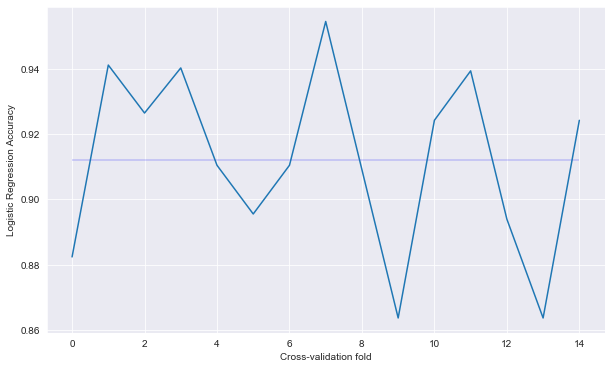

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Set random seed for reproducibility
np.random.seed(1000)


if __name__ == '__main__':
    # Create the dataset
    X, Y = make_classification(n_samples=1000, random_state=1000)

    # Perform a CV with 15 folds and a Logistic Regression
    score = cross_val_score(LogisticRegression( solver='lbfgs'), 
                            X, Y, cv=15)

    print('Average CV score: {}'.format(np.mean(score)))
    print('CV score variance: {}'.format(np.var(score)))

    # Plot the scores
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(score)
    ax.set_xlabel('Cross-validation fold')
    ax.set_ylabel('Logistic Regression Accuracy')
    ax.grid(True)
    ax.hlines(y=np.mean(score), xmin=0, xmax=14, color="b", alpha=.2)
    plt.show()

### Different variants of cross-validation

- __Stratified K-Fold__: A standard K-Fold approach splits the dataset without considering the probability distribution $p(y|x)$, therefore some folds may theoretically contain only a limited number of labels. Stratified K-Fold, instead, tries to __split $X$ so that all the labels are equally represented.__
- __Leave-one-out (LOO)__: This approach is the most drastic because it creates N folds, each of them containing $N-1$ training samples and only one test sample. In this way, the maximum possible number of samples is used for training, and it's quite easy to detect whether the algorithm is able to learn with sufficient accuracy, or if it's better to adopt another strategy.
     - when N is very large this can cause a performance issue. 
     - with a large number of samples, many of the folds will yield  almost identical results.
     -  limits the possibilities for assessing the generalization ability of a model, because a single test sample is not enough for a reasonable estimation.
- __Leave-P-out (LPO)__: In this case, the number of test samples is set to p non-disjoint sets, so the number of folds is equal to the binomial coefficient of n over $p$. if $p$ isn't small or big enough, the binomial coefficient can exponentially explode, as shown in the following figure in case of $n=20$ and :

the following image shows Exploding effect of the binomial coefficient when $p$ is about half of $n$

![image.png](attachment:image.png)

### Hint
Scikit-learn implements all those methods, with some other variations, but I suggest always using the `cross_val_score()` function, which is a helper that allows applying the different methods to a specific problem. It uses __Stratified K-Fold__ for categorical classifications and __Standard K-Fold__ for all other cases. 

### Example: determine the optimal number of folds

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, Y = make_classification(n_samples=500, n_classes=5, n_features=50,
                          n_informative=10, n_redundant=5, 
                           n_clusters_per_class=3, random_state=1000)

ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, StratifiedKFold
lr = LogisticRegression(solver="lbfgs", random_state=1000)
splits = StratifiedKFold(n_splits=10, shuffle=True, random_state=1000)
train_sizes = np.linspace(0.1, 1.0, 20)
lr_train_sizes, lr_train_scores, lr_test_scores = \
   learning_curve(lr, X, Y, cv=splits, train_sizes=train_sizes,
                   n_jobs=-1, scoring='accuracy', 
                   shuffle=True, random_state=1000)